In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\hemar\AppData\Local\Temp\ipykernel_26844\2725848234.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/hemar/Downloads/AAPL 3m.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.879326,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.829399,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.422394,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.951584,70790800


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.879326   
1  2023-01-04  126.889999  128.660004  125.080002  126.360001  126.167366   
2  2023-01-05  127.129997  127.769997  124.760002  125.019997  124.829399   
3  2023-01-06  126.010002  130.289993  124.889999  129.619995  129.422394   
4  2023-01-09  130.470001  133.410004  129.889999  130.149994  129.951584   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
(62, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


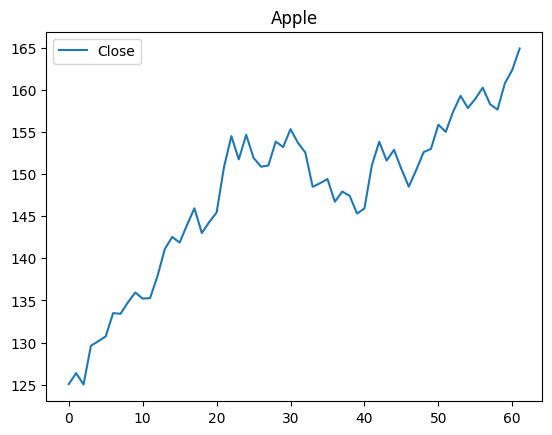

In [5]:
df[['Close']].plot()
plt.title("Apple")
plt.show()

Text(0.5, 1.0, 'Apple Cumulative Returns')

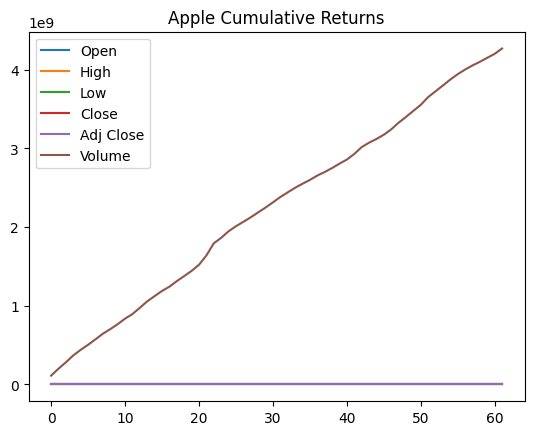

In [6]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Apple Cumulative Returns')

Text(0.5, 1.0, 'Apple Autocorrelation plot')

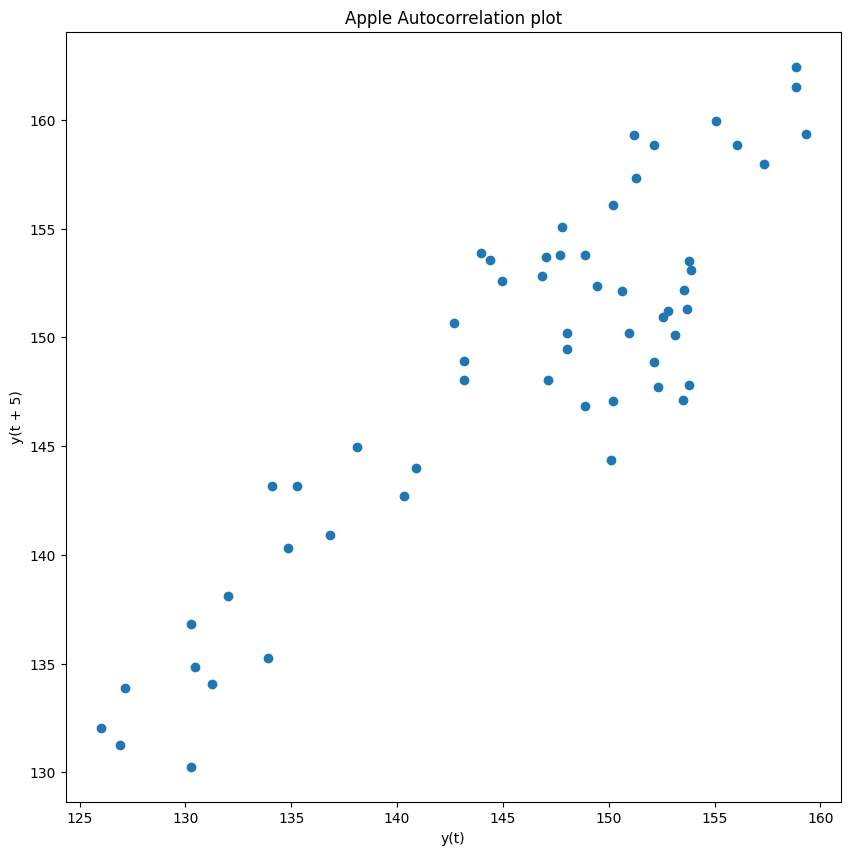

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Apple Autocorrelation plot')

# ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv("C:/Users/hemar/Downloads/AAPL 3m.csv")
df['Date'][2]

'2023-01-05'

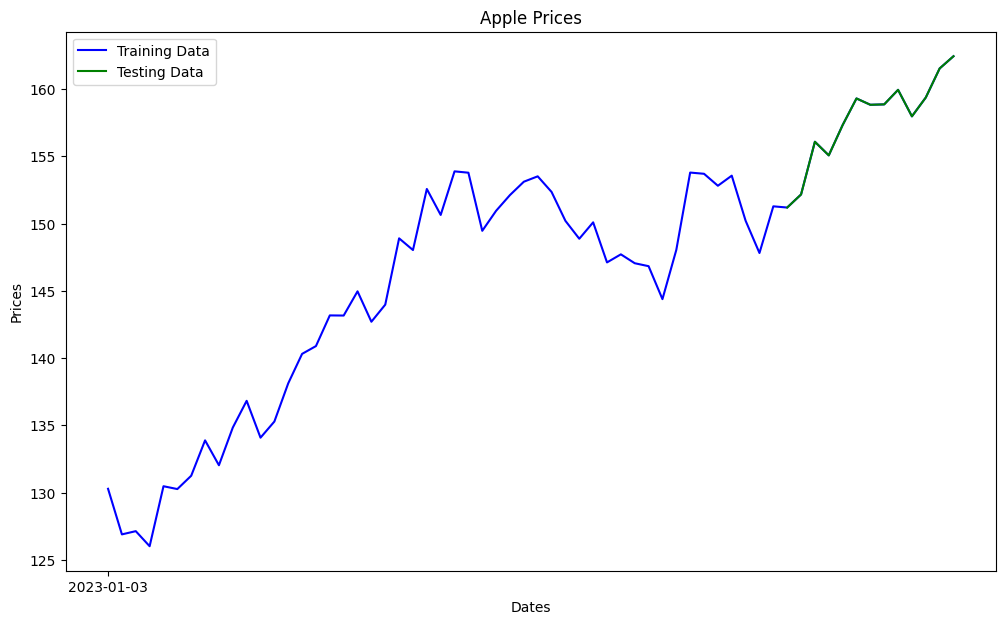

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,54, 300), df['Date'][0:54:300])
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [11]:
df = pd.read_csv("C:/Users/hemar/Downloads/AAPL 3m.csv").fillna(0)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
57,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
58,2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200
59,2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
60,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
61,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv("C:/Users/hemar/Downloads/AAPL 3m.csv")
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .60 ))

training_data_len
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
## LSTM
import sys
print (sys.path)

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


[array([0.00125384, 0.03360091, 0.        , 0.115346  , 0.12863584,
       0.14317952, 0.21238738, 0.21038133, 0.24423267, 0.27382161,
       0.25551682, 0.25702126, 0.32221662, 0.40346051, 0.43906728,
       0.42226693, 0.47492506, 0.52432291, 0.45085267, 0.48319953,
       0.51178529, 0.64694112, 0.73921778, 0.6697593 , 0.74297892,
       0.67452365, 0.64819458, 0.65170511, 0.72291904, 0.70661991])]
[0.7600302728207331]

[array([0.00125384, 0.03360091, 0.        , 0.115346  , 0.12863584,
       0.14317952, 0.21238738, 0.21038133, 0.24423267, 0.27382161,
       0.25551682, 0.25702126, 0.32221662, 0.40346051, 0.43906728,
       0.42226693, 0.47492506, 0.52432291, 0.45085267, 0.48319953,
       0.51178529, 0.64694112, 0.73921778, 0.6697593 , 0.74297892,
       0.67452365, 0.64819458, 0.65170511, 0.72291904, 0.70661991]), array([0.03360091, 0.        , 0.115346  , 0.12863584, 0.14317952,
       0.21238738, 0.21038133, 0.24423267, 0.27382161, 0.25551682,
       0.25702126, 0.32221662, 0.4

In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


4.03882901880878

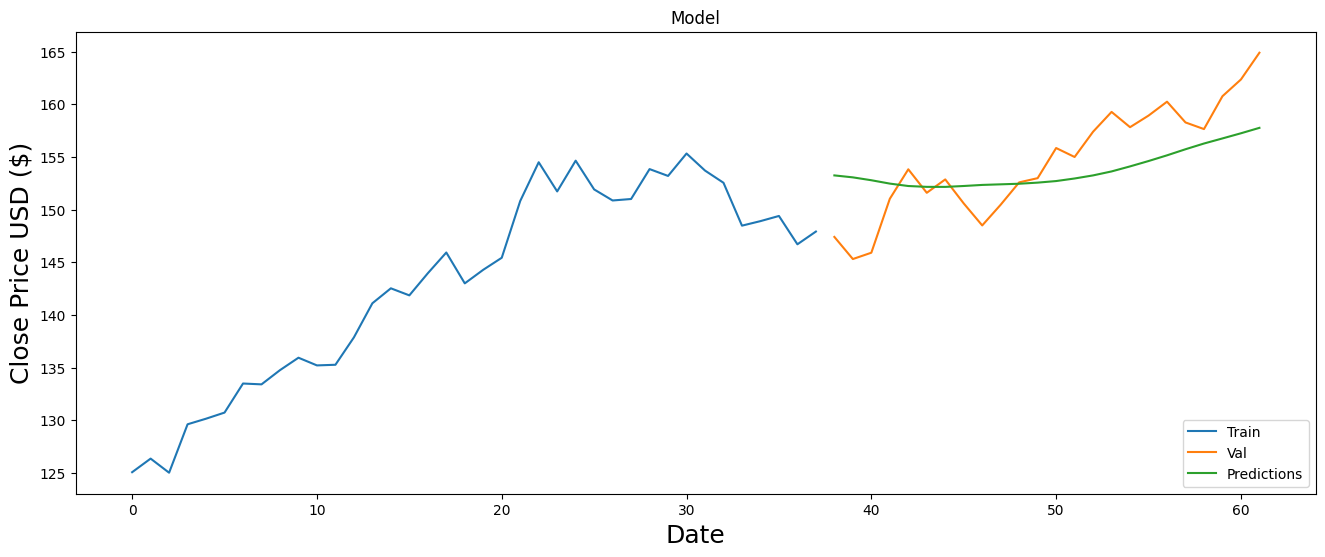

In [14]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [15]:
# Show the valid and predicted prices
valid

,Close,Predictions
38,147.410004,153.250931
39,145.309998,153.065231
40,145.910004,152.791534
41,151.029999,152.472366
42,153.830002,152.243607
43,151.600006,152.163284
44,152.869995,152.160156
45,150.589996,152.245438
46,148.500000,152.347000
47,150.470001,152.403671


In [16]:
df2 = df['Close']

In [17]:
df2.tail()

57    158.279999
58    157.649994
59    160.770004
60    162.360001
61    164.899994
Name: Close, dtype: float64

In [18]:
df2 = pd.DataFrame(df2)   

In [19]:
df2.tail()

,Close
57,158.279999
58,157.649994
59,160.770004
60,162.360001
61,164.899994


In [20]:
# Prediction 30 days into the future.
future_days = 30
df2['Prediction'] = df2['Close'].shift(-future_days)

In [21]:
df2.tail()

,Close,Prediction
57,158.279999,NaN
58,157.649994,NaN
59,160.770004,NaN
60,162.360001,NaN
61,164.899994,NaN


In [22]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[125.07    ]
 [126.360001]
 [125.019997]
 [129.619995]
 [130.149994]
 [130.729996]
 [133.490005]
 [133.410004]
 [134.759995]
 [135.940002]
 [135.210007]
 [135.270004]
 [137.869995]
 [141.110001]
 [142.529999]
 [141.860001]
 [143.960007]
 [145.929993]
 [143.      ]
 [144.289993]
 [145.429993]
 [150.820007]
 [154.5     ]
 [151.729996]
 [154.649994]
 [151.919998]
 [150.869995]
 [151.009995]
 [153.850006]
 [153.199997]
 [155.330002]
 [153.710007]]


In [23]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[155.330002 153.710007 152.550003 148.479996 148.910004 149.399994
 146.710007 147.919998 147.410004 145.309998 145.910004 151.029999
 153.830002 151.600006 152.869995 150.589996 148.5      150.470001
 152.589996 152.990005 155.850006 155.       157.399994 159.279999
 157.830002 158.929993 160.25     158.279999 157.649994 160.770004
 162.360001 164.899994]
